### Clean genres access via API

In [59]:
import pandas as pd

In [60]:
df_genres = pd.read_csv('interm_outputs/book_genres_api.csv')

df_genres = df_genres[df_genres['Genres'] != 'Unknown Genre']

print(len(df_genres))
df_genres.head(5)

194


,ISBN,Title,Genres
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general"
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction"
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t..."
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing"
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ..."


In [61]:
# Function to clean genres and keep only the first genre
def get_major_genre(genre_str):
    # Handle 'Unknown Genre'
    #if genre_str == 'Unknown Genre':
     #   return 'Unknown Genre'
    # Split by commas, strip extra spaces, and take the first genre
    genres = [genre.strip() for genre in genre_str.split(',')]

    selected_genre = genres[0]

    # If the first genre is 'Authorship', take the second genre
    if genres[0].lower() == 'authorship' and len(genres) > 1:
        selected_genre = genres[1]

    selected_genre = selected_genre.lower()

    return selected_genre  

In [62]:
# Function to split genres and count occurrences
def count_genres(genre_str):
    # Split the genre string by commas and strip extra spaces
    genres = [genre.strip().lower() for genre in genre_str.split(',')]
    return genres


### Get major Genres

In [63]:
# Apply the function to the 'Genres' column
df_genres['Major_genre'] = df_genres['Genres'].apply(get_major_genre)

In [64]:
df_genres.head(200)

,ISBN,Title,Genres,Major_genre
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general",africa
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction",children's fiction
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t...",history
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing",marketing
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ...",french language materials
...,...,...,...,...
258,1569312532,Ranma 1/2,"manga, Teenage boys, Young adult fiction, Magi...",manga
260,1853260959,King Lear (Wordsworth Classics) (Wordsworth Cl...,"Drama, King Lear (Legendary character), Father...",drama
261,1886155003,The magic mirror of M.C. Escher,"Composition (Art), Escher, m. c. (maurits corn...",composition (art)
263,1561791016,Strange journey back,"Conduct of life, Divorce, Fiction, Friendship,...",conduct of life


In [65]:
### Count the number of books in each genre
genre_counts = df_genres['Major_genre'].value_counts()

### Sort the genres by count
genre_counts = genre_counts.sort_values(ascending=False)

genre_counts

Major_genre
fiction                      35
history                       3
juvenile fiction              2
french language materials     2
children's fiction            2
                             ..
international relations       1
teenage girls                 1
manga                         1
composition (art)             1
design and construction       1
Name: count, Length: 145, dtype: int64

### Count all genres

In [66]:
# Apply the count_genres function to the 'Genres' column
df_genres['Genres List'] = df_genres['Genres'].apply(count_genres)
df_genres

,ISBN,Title,Genres,Major_genre,Genres List
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general",africa,"[africa, description and travel, fiction, gene..."
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction",children's fiction,"[children's fiction, baseball, fiction]"
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t...",history,"[history, nonfiction, travel, description and ..."
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing",marketing,"[authorship, marketing, authorship, marketing]"
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ...",french language materials,"[french language materials, foreign languages,..."
...,...,...,...,...,...
258,1569312532,Ranma 1/2,"manga, Teenage boys, Young adult fiction, Magi...",manga,"[manga, teenage boys, young adult fiction, mag..."
260,1853260959,King Lear (Wordsworth Classics) (Wordsworth Cl...,"Drama, King Lear (Legendary character), Father...",drama,"[drama, king lear (legendary character), fathe..."
261,1886155003,The magic mirror of M.C. Escher,"Composition (Art), Escher, m. c. (maurits corn...",composition (art),"[composition (art), escher, m. c. (maurits cor..."
263,1561791016,Strange journey back,"Conduct of life, Divorce, Fiction, Friendship,...",conduct of life,"[conduct of life, divorce, fiction, friendship..."


In [73]:
# Function to categorize based on the presence of 'fiction' in the Genres List
def categorize_major_genre(genres_list):
    # Check if any element in the Genres List contains the substring 'fiction' (case-insensitive)
    if any('fiction' in genre.lower() for genre in genres_list):
        return 'Fiction'
    else:
        return 'Other'

# Apply the categorization function to the Genres List
df_genres['Major_genre'] = df_genres['Genres List'].apply(categorize_major_genre)

df_genres

,ISBN,Title,Genres,Major_genre,Genres List
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general",Fiction,"[africa, description and travel, fiction, gene..."
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction",Fiction,"[children's fiction, baseball, fiction]"
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t...",Fiction,"[history, nonfiction, travel, description and ..."
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing",Other,"[authorship, marketing, authorship, marketing]"
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ...",Fiction,"[french language materials, foreign languages,..."
...,...,...,...,...,...
258,1569312532,Ranma 1/2,"manga, Teenage boys, Young adult fiction, Magi...",Fiction,"[manga, teenage boys, young adult fiction, mag..."
260,1853260959,King Lear (Wordsworth Classics) (Wordsworth Cl...,"Drama, King Lear (Legendary character), Father...",Fiction,"[drama, king lear (legendary character), fathe..."
261,1886155003,The magic mirror of M.C. Escher,"Composition (Art), Escher, m. c. (maurits corn...",Other,"[composition (art), escher, m. c. (maurits cor..."
263,1561791016,Strange journey back,"Conduct of life, Divorce, Fiction, Friendship,...",Fiction,"[conduct of life, divorce, fiction, friendship..."


In [85]:
### Count major genres

major_genre_counts = df_genres['Major_genre'].value_counts()
major_genre_counts

Major_genre
Fiction    106
Other       88
Name: count, dtype: int64

In [90]:
df_genres_clean = df_genres.loc[:, ['ISBN', 'Title','Major_genre','Genres List']]

df_genres_clean.rename(columns={'Genres List': 'Genres_list', 'Major_genre': 'Genre_category'}, inplace=True)
df_genres_clean.head(5)

,ISBN,Title,Genre_category,Genres_list
0,1841193429,Looking for Lovedu,Fiction,"[africa, description and travel, fiction, gene..."
2,059045174X,The Field Beyond the Outfield,Fiction,"[children's fiction, baseball, fiction]"
3,1840243503,"Brazil: Life, Blood, Soul",Fiction,"[history, nonfiction, travel, description and ..."
4,1884956173,Damn! Why didn't I write that?,Other,"[authorship, marketing, authorship, marketing]"
5,067973385X,Exile and the kingdom,Fiction,"[french language materials, foreign languages,..."


In [91]:
df_genres_clean.to_csv('interm_outputs/book_genres_clean.csv', index=False)

#### Analyze number of each category - for exploreation

In [74]:
from collections import Counter

In [80]:
# Flatten the list of genres across all books
all_genres = [genre for genres in df_genres['Genres List'] for genre in genres]

# Count the occurrence of each genre using Counter
genre_counts = Counter(all_genres)


## Sort genre counts
genre_counts

Counter({'fiction': 334,
         'general': 83,
         'romance': 24,
         'large type books': 24,
         'history': 23,
         'historical': 23,
         'fantasy': 22,
         'biography': 19,
         'social life and customs': 16,
         'science fiction': 14,
         "children's fiction": 13,
         'mystery & detective': 13,
         'united states': 13,
         'romans': 12,
         'suspense': 12,
         'thrillers': 11,
         'juvenile fiction': 10,
         'man-woman relationships': 10,
         'nouvelles': 10,
         'scotland': 8,
         'literature': 8,
         'comic books': 8,
         'strips': 8,
         'women': 8,
         'drama': 7,
         'humorous': 7,
         'fantasy fiction': 7,
         'friendship': 7,
         'comics & graphic novels': 7,
         'dogs': 7,
         'english language': 7,
         'etc.': 7,
         'american': 7,
         'contemporary': 7,
         'english literature': 6,
         'adventure stories'

In [83]:
# Optional: You can create a new DataFrame to store genre counts
genre_count_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

## Sort the genres by count
genre_count_df = genre_count_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

genre_count_df['Percentage'] = round(genre_count_df['Count'] / genre_count_df['Count'].sum() * 100,2)

genre_count_df.head(10)

,Genre,Count,Percentage
0,fiction,334,13.17
1,general,83,3.27
2,romance,24,0.95
3,large type books,24,0.95
4,historical,23,0.91
5,history,23,0.91
6,fantasy,22,0.87
7,biography,19,0.75
8,social life and customs,16,0.63
9,science fiction,14,0.55


C:\Users\jantimko\AppData\Local\Temp\ipykernel_25104\2058214333.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_count_df.head(10), palette='viridis')


Text(0, 0.5, 'Genre')

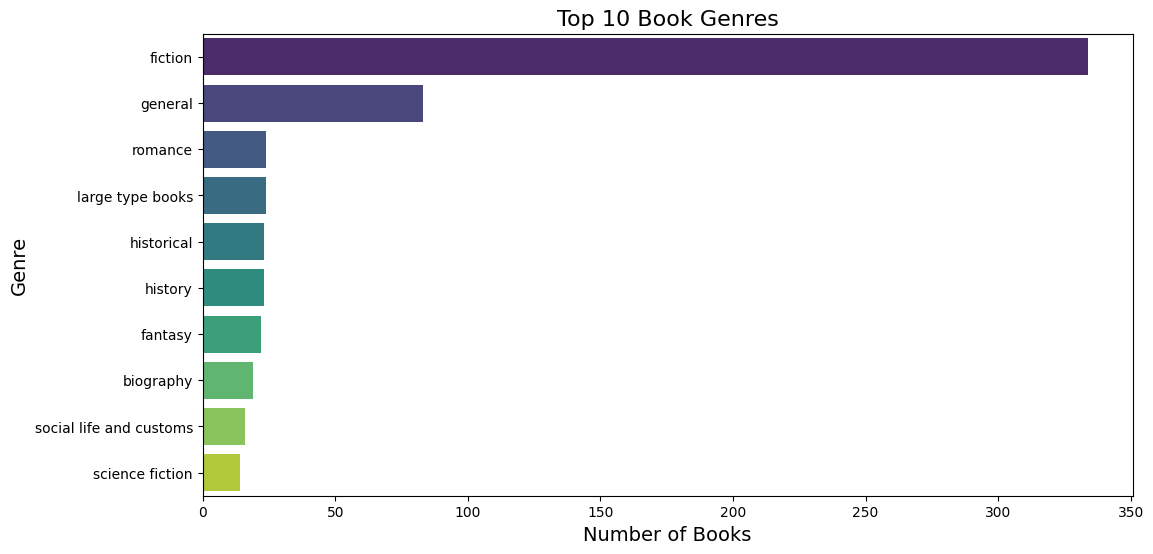

In [93]:
### Plot the bar chart of the top 10 genres using seaborn

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=genre_count_df.head(10), palette='viridis')

# Set the title and labels
plt.title('Top 10 Book Genres', fontsize=16)
plt.xlabel('Number of Books', fontsize=14)
plt.ylabel('Genre', fontsize=14)


# Set 